## Silly Graph Test for Jupyter

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.close('all')

In [73]:
STATE = 'California'
COUNTY = 'Santa Barbara'

In [36]:
#data pulled from John Hopkins University at https://github.com/CSSEGISandData/COVID-19
confirmed_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
dead_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")

In [37]:
def get_county(df, state, county):
    start_ndx = 100
    df = df[df['Province_State'] ==state]
    df = df[df['Admin2'] == county]
    df = df.iloc[:,start_ndx:]
    return df
    #clean data function isn't working

In [93]:
def rename(df, name):
    return df.rename(columns={df.columns[0]: name})

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa584029ee0>,
      dtype=object)

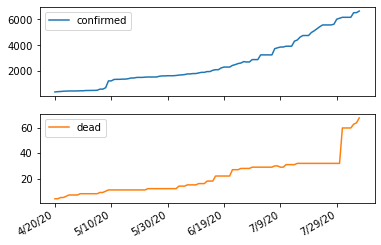

In [104]:
ca_dead_df = get_county(dead_df, STATE, COUNTY).T
ca_conf_df = get_county(confirmed_df, STATE, COUNTY).T
#need to rename the columns
ca_conf_df = rename(ca_conf_df, 'confirmed')
ca_dead_df = rename(ca_dead_df, 'dead')
combined_df = pd.concat([ca_conf_df, ca_dead_df], axis=1, join = 'inner')
combined_df.plot(subplots=True)

,dead
8/2/20,60
8/3/20,60
8/4/20,63
8/5/20,64
8/6/20,68
